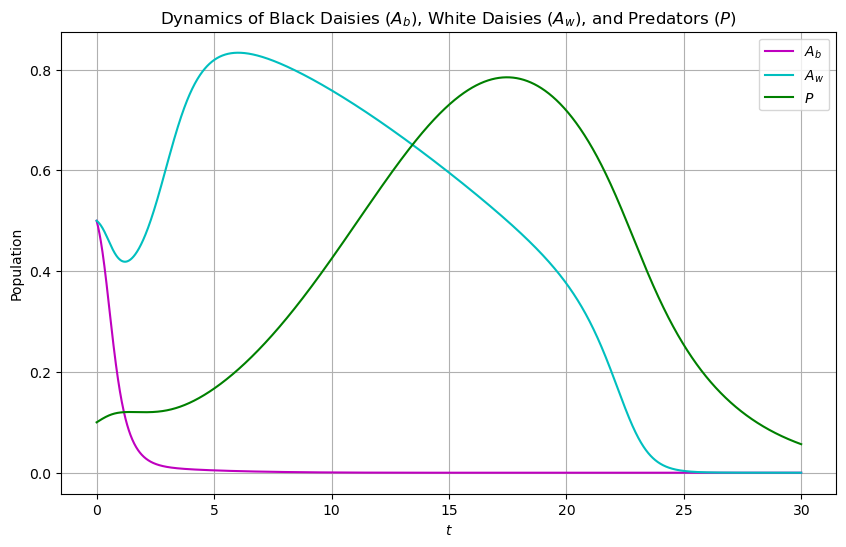

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate of Black Daisy
delta = 0.01     # Death Rate of White Daisy
alpha = 0.6    # Growth Rate of Predators per Daisy eaten
beta = 0.3     # Death Rate of Predators

# dA/dt of Black Daisy
def vb(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
    bb = 1 - (0.003265 * ((273.15 + Ti) - Tb) ** 2)       # Black Daisy Growth Rate
    
    return Ab * ((1 - Ab - Aw) * bb - gamma - alpha * P)

# dA/dt of White Daisy
def vw(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
    bw = 1 - (0.003265 * ((273.15 + Ti) - Tw) ** 2)       # White Daisy Growth Rate
    
    return Aw * ((1 - Aw - Ab) * bw - delta - alpha * P)

# dP/dt of Predators
def vp(Ab, Aw, P):
    return alpha * (Ab + Aw) * P - beta * P

def traj2(Ab0, Aw0, P0, dt=0.01, duration=30):
    t = np.arange(0, duration, dt)
    pos = np.zeros((3, len(t)))

    Ab = Ab0
    Aw = Aw0
    P = P0
    
    for i in range(len(t)):
        pos[0, i] = Ab
        pos[1, i] = Aw
        pos[2, i] = P
        
        Ab += vb(Ab, Aw, P) * dt
        Aw += vw(Ab, Aw, P) * dt
        P += vp(Ab, Aw, P) * dt
        
        # Ensure populations do not go negative.
        Ab = max(Ab, 0)
        Aw = max(Aw, 0)
        P = max(P, 0)
        
    return t, pos

# Initial conditions: Abundance of Black Daisies, White Daisies and Predators
t, pos = traj2(0.5, 0.5, 0.1)

# Plotting results for Daisies and Predators over time
plt.figure(figsize=(10,6))
plt.plot(t, pos[0], 'm', label='$A_b$')   # Black Daisies
plt.plot(t, pos[1], 'c', label='$A_w$')   # White Daisies
plt.plot(t, pos[2], 'g', label='$P$')      # Predator Population

# Formatting plot
# plt.xlim(0, 20)
# plt.ylim(-0.1, max(pos[2]) + 0.1)
plt.xlabel('$t$')
plt.ylabel('Population')
plt.legend()
plt.title('Dynamics of Black Daisies ($A_b$), White Daisies ($A_w$), and Predators ($P$)')
plt.grid()
plt.savefig('Dynamics of Black Daisies ($A_b$), White Daisies ($A_w$), and Predators ($P$)')
plt.show()

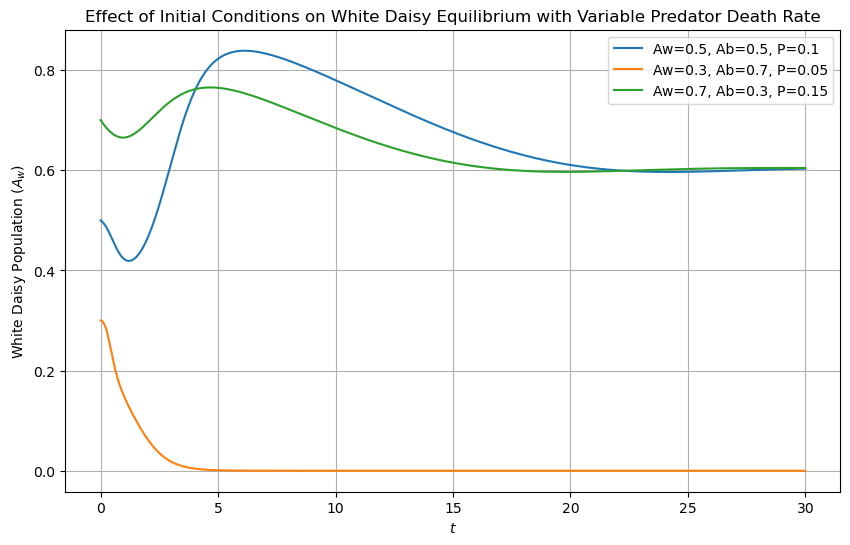

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.3      # Death Rate of Black Daisy
delta = 0.01     # Death Rate of White Daisy
alpha = 0.6      # Growth Rate of Predators per Daisy eaten

# Function to define death rate of predators based on their population
def beta_function(P):
    return 0.3 + 0.1 * P  # Example: Base death rate + increase with population

# dA/dt of Black Daisy
def vb(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
    bb = 1 - (0.003265 * ((273.15 + Ti) - Tb) ** 2)       # Black Daisy Growth Rate
    
    return Ab * ((1 - Ab - Aw) * bb - gamma - alpha * P)

# dA/dt of White Daisy
def vw(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
    bw = 1 - (0.003265 * ((273.15 + Ti) - Tw) ** 2)       # White Daisy Growth Rate
    
    return Aw * ((1 - Aw - Ab) * bw - delta - alpha * P)

# dP/dt of Predators with variable death rate based on population size
def vp(Ab, Aw, P):
    beta = beta_function(P)  # Get the current death rate based on population size
    return alpha * (Ab + Aw) * P - beta * P

def traj2(Ab0, Aw0, P0, dt=0.01, duration=30):
    t = np.arange(0, duration, dt)
    pos = np.zeros((3, len(t)))

    Ab = Ab0
    Aw = Aw0
    P = P0
    
    for i in range(len(t)):
        pos[0, i] = Ab
        pos[1, i] = Aw
        pos[2, i] = P
        
        Ab += vb(Ab, Aw, P) * dt
        Aw += vw(Ab, Aw, P) * dt
        P += vp(Ab, Aw, P) * dt
        
        # Ensure populations do not go negative.
        Ab = max(Ab, 0)
        Aw = max(Aw, 0)
        P = max(P, 0)
        
    return t, pos

# Define initial conditions for various scenarios to test the dynamics.
initial_conditions = [
    (0.5, 0.5, 0.1),   # Scenario A: Moderate initial levels
    (0.7, 0.3, 0.05),  # Scenario B: More black daisies initially
    (0.3, 0.7, 0.15),  # Scenario C: More white daisies initially
]

plt.figure(figsize=(10,6))

# Run simulations for each scenario and plot results.
for Ab_init, Aw_init, P_init in initial_conditions:
    t, pos = traj2(Ab_init, Aw_init, P_init)
    
    plt.plot(t, pos[1], label=f'Aw={Aw_init}, Ab={Ab_init}, P={P_init}')   # Plotting only white daisies

plt.xlabel('$t$')
plt.ylabel('White Daisy Population ($A_w$)')
plt.title('Effect of Initial Conditions on White Daisy Equilibrium with Variable Predator Death Rate')
plt.legend()
plt.grid()
plt.savefig('Effect of Initial Conditions on White Daisy Equilibrium with Variable Predator Death Rate')
plt.show()

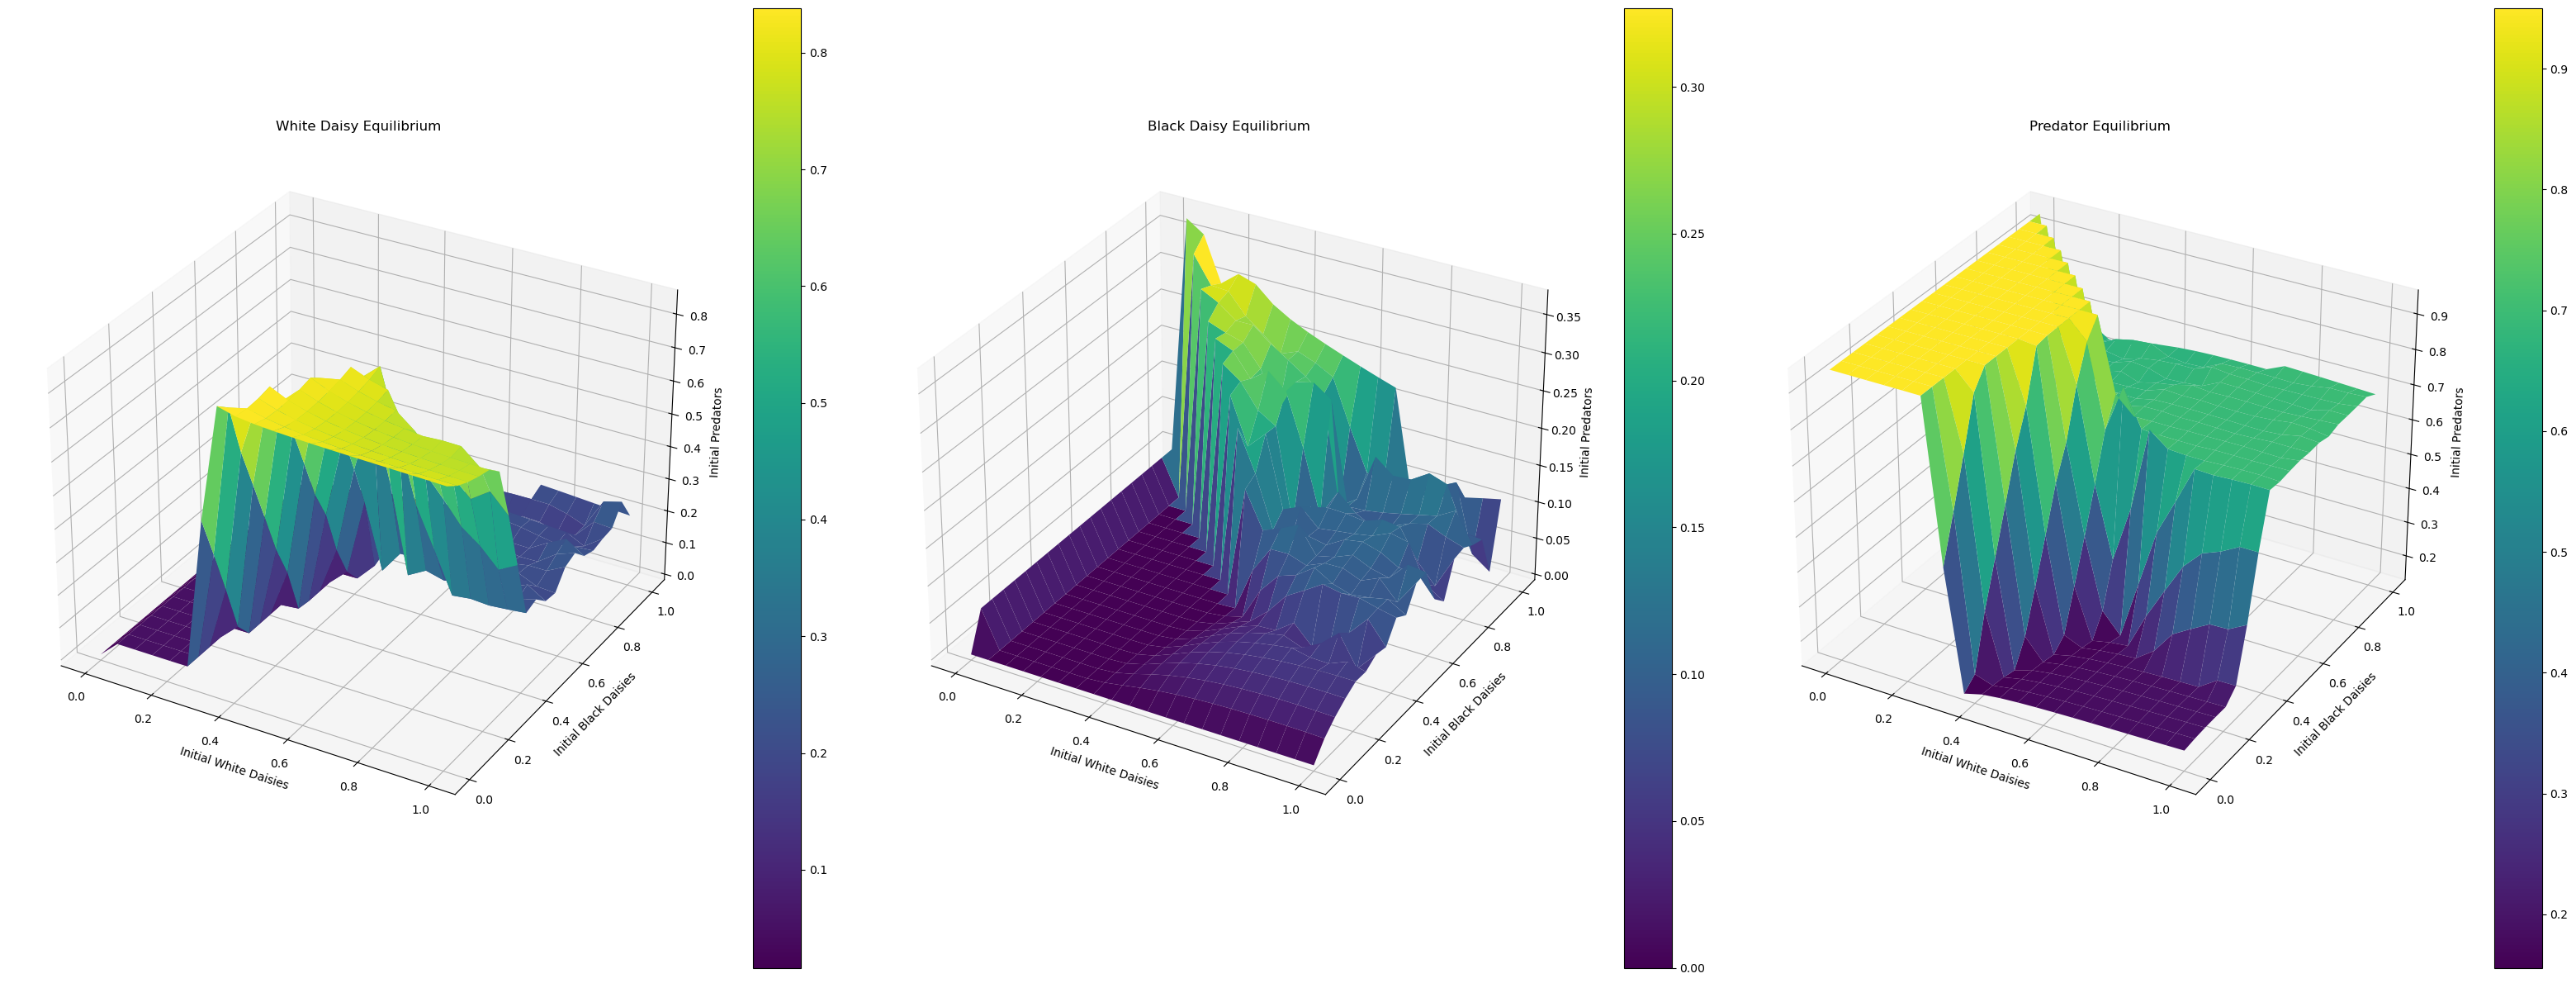

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 1.500        # Luminosity
ab = 0.25        # Black Daisy Albedo
aw = 0.75        # White Daisy Albedo
ag = 0.5         # Ground Albedo
R = 0.2          # Insulation Constant
S = 917          # Solar Constant
sigma = 5.67e-8  # Stefan-Boltzmann Constant
Ti = 22.5        # Ideal Growth Temperature
gamma = 0.01      # Death Rate of Black Daisy
delta = 0.01     # Death Rate of White Daisy
alpha = 0.3      # Growth Rate of Predators per Daisy eaten

# dA/dt of Black Daisy
def vb(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    
    if ap < 0 or ap > 1:  # Ensure valid albedo values
        return 0
    
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    
    if Te < 0:  # Prevent invalid temperature calculations
        return 0
    
    Tb = (R * L * (S / sigma) * (ap - ab) + (Te ** 4)) ** 0.25  # Black Daisy Temp
    
    if Tb < 0:  # Prevent invalid temperature calculations
        return 0
    
    bb = 1 - (0.003265 * ((273.15 + Ti) - Tb) ** 2)       # Black Daisy Growth Rate
    
    return Ab * ((1 - Ab - Aw) * bb - gamma - alpha * P)

# dA/dt of White Daisy
def vw(Ab, Aw, P):
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag           # Planet Albedo
    
    if ap < 0 or ap > 1:  # Ensure valid albedo values
        return 0
    
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25             # Planet Temp
    
    if Te < 0:  # Prevent invalid temperature calculations
        return 0
    
    Tw = (R * L * (S / sigma) * (ap - aw) + (Te ** 4)) ** 0.25  # White Daisy Temp
    
    if Tw < 0:  # Prevent invalid temperature calculations
        return 0
    
    bw = 1 - (0.003265 * ((273.15 + Ti) - Tw) ** 2)       # White Daisy Growth Rate
    
    return Aw * ((1 - Aw - Ab) * bw - delta - alpha * P)

# dP/dt of Predators
def vp(Ab, Aw, P):
    beta = beta_function(P)
    return alpha * (Ab + Aw) * P - beta * P

def beta_function(P):
    return max(0.3 + 0.1 * P, 0)   # Ensure death rate is non-negative

def equilibrium(Ab0, Aw0, P0, dt=0.05, duration=10):   # Increased dt for faster computation
    t = np.arange(0, duration, dt)
    pos = np.zeros((3, len(t)))

    Ab = Ab0
    Aw = Aw0
    P = P0
    
    for i in range(len(t)):
        pos[0, i] = Ab
        pos[1, i] = Aw
        pos[2, i] = P
        
        Ab += vb(Ab, Aw, P) * dt
        Aw += vw(Ab, Aw, P) * dt
        P += vp(Ab, Aw, P) * dt
        
        # Ensure populations do not go negative.
        Ab = max(Ab, 0)
        Aw = max(Aw, 0)
        P = max(P, 0)
        
    total_population = Ab + Aw + P
    if total_population > 0:
        return Ab / total_population, Aw / total_population, P / total_population
    else:
        return Ab / max(1e-6,total_population), Aw / max(1e-6,total_population), P / max(1e-6,total_population)

# Create a grid of initial conditions
Aw_values = np.linspace(0, 1, 20)
Ab_values = np.linspace(0, 1, 20)
P_values = np.linspace(0, 1, 20)

Aw_grid, Ab_grid, P_grid = np.meshgrid(Aw_values, Ab_values, P_values)

# Compute equilibrium values for each combination of initial conditions
Aw_eq = np.zeros((Aw_grid.shape[0], Ab_grid.shape[1], P_grid.shape[2]))
Ab_eq = np.zeros((Aw_grid.shape[0], Ab_grid.shape[1], P_grid.shape[2]))
P_eq = np.zeros((Aw_grid.shape[0], Ab_grid.shape[1], P_grid.shape[2]))

for i in range(Aw_grid.shape[0]):
    for j in range(Ab_grid.shape[1]):
        for k in range(P_grid.shape[2]):
            Ab_eq[i,j,k], Aw_eq[i,j,k], P_eq[i,j,k] = equilibrium(
                Ab_grid[i,j,k], 
                Aw_grid[i,j,k], 
                P_grid[i,j,k]
            )

# Create a figure for heat maps with three subplots for each equilibrium value.
fig = plt.figure(figsize=(32,12))

# Heatmap for White Daisy Equilibrium Values with common axes.
ax1 = fig.add_subplot(131, projection='3d')
surf1 = ax1.plot_surface(Aw_grid[:, :, :].mean(axis=2), 
                          Ab_grid[:, :, :].mean(axis=2), 
                          Aw_eq[:, :, :].mean(axis=2), 
                          cmap='viridis', edgecolor='none')
ax1.set_xlabel('Initial White Daisies')
ax1.set_ylabel('Initial Black Daisies')
ax1.set_zlabel('Initial Predators')
ax1.set_title('White Daisy Equilibrium')
plt.colorbar(surf1)

# Heatmap for Black Daisy Equilibrium Values with common axes.
ax2 = fig.add_subplot(132, projection='3d')
surf2 = ax2.plot_surface(Aw_grid[:, :, :].mean(axis=2), 
                          Ab_grid[:, :, :].mean(axis=2), 
                          Ab_eq[:, :, :].mean(axis=2), 
                          cmap='viridis', edgecolor='none')
ax2.set_xlabel('Initial White Daisies')
ax2.set_ylabel('Initial Black Daisies')
ax2.set_zlabel('Initial Predators')
ax2.set_title('Black Daisy Equilibrium')
plt.colorbar(surf2)

# Heatmap for Predator Equilibrium Values with common axes.
ax3 = fig.add_subplot(133, projection='3d')
surf3 = ax3.plot_surface(Aw_grid[:, :, :].mean(axis=2), 
                          Ab_grid[:, :, :].mean(axis=2), 
                          P_eq[:, :, :].mean(axis=2), 
                          cmap='viridis', edgecolor='none')
ax3.set_xlabel('Initial White Daisies')
ax3.set_ylabel('Initial Black Daisies')
ax3.set_zlabel('Initial Predators')
ax3.set_title('Predator Equilibrium')
plt.colorbar(surf3)

# Save the third plot as an image file.
plt.savefig('whiteblackpredator_equilibrium.png')

plt.tight_layout()
plt.show()